To calculate Fick's Law in one dimension, first you must find the chemical potential by taking the second derivative of the Gibbs free energy with respect to the change in concentration along the x-axis and multiply it by $M$, the mobility of the chemical. Then you must take the divergence of the chemical potential, giving you the diffusion constant $D$ multiplied by the second derivative of concentration with respect to $x$. 

In this, I assume that the system has two chemical compenents. Together their molar concentration equals 1. I also assume that mole fraction $X$ is only a function of $x$. $G_A$ and $G_B$ are both constants that depend on the melting temperature and heat of fusion of the chemicals, $R$ is the gas constant and $T$ is the temperature in Kelvin.

In [42]:
import sympy as sp
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
import sympy.vector as spv
from matplotlib import cm

x, y, z = sp.symbols('x y z')

sp.init_session()

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [119]:
g_a,g_b, R, T, X, a = sp.symbols("G_A G_B R T X A")
b= sp.symbols('X_B', cls=Function)
M = sp.symbols ('M', positive = True)
g = g_a*(1-b(x)) + g_b*b(x) + R*T*(b(x)*sp.ln(b(x))+(1-b(x))*sp.ln(1-b(x)))
g

In [120]:
sp.diff(g,b(x))


In [132]:
M = a*(1-b(x))*b(x)/(R*T)

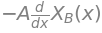

In [133]:
chemDerv= -M*sp.diff(sp.diff(g,b(x)),x).together()
chemDerv


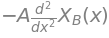

In [134]:

div = chemDerv.diff(x)
div


To make $D$ equal to the constant $A$, I had to assume the mobility $M$ was equal to $A*(1 - X_B(x))*X_B(x)/RT $.